In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import entropy
from sklearn.datasets import make_blobs, make_moons
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

# <font color = 'red'> ЛР 5. Дерево принятия решений </font>

Сложность: <font color = 'green'> Легко  </font>.

Дата составления: 21.10.2023

Срок выполнения: 1 неделя (с момента первой практики после выдачи).

Автор: ст. преподаватель Кушнеров А.В.

## <font color = 'green'> 1. Энтропия.  </font>

**Энтропия Шеннона** - мера хаотичности множества. Пусть задано множество из $N$ представителей $s$ различных классов. $X = (x_{1},x_{1},x_{1},...,x_{2},x_{2},...,...x_{s},x_{s},...)$.

Энтропия тогда может быть вычислена по формуле:

$$S(X)=-\displaystyle\sum_{i=1}^{s} p_{i}\log_2 p_{i}$$

Где, $p_{i}=N_{i}/N$.

<font color = 'red' size = 5>Задание 1 </font>

Реализуйте функцию для подсчёта энтропии Шеннонна для заданной выборки. Сравните результат работы со встроенной функцией.


[Справочная информация](https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D1%84%D0%BE%D1%80%D0%BC%D0%B0%D1%86%D0%B8%D0%BE%D0%BD%D0%BD%D0%B0%D1%8F_%D1%8D%D0%BD%D1%82%D1%80%D0%BE%D0%BF%D0%B8%D1%8F)


In [12]:
test = np.random.randint(0,3,100)
test

unique, counts = np.unique(test, return_counts=True) #находит уникальные элементы в массиве

In [13]:
test

array([0, 1, 0, 0, 1, 1, 0, 2, 0, 1, 2, 1, 2, 2, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 2, 1, 0, 0, 0, 1, 0, 1, 1, 2, 1, 1, 1, 0, 2, 1, 1, 0, 0, 2, 1,
       0, 1, 1, 0, 1, 2, 2, 0, 2, 0, 1, 0, 1, 0, 0, 1, 1, 2, 0, 2, 2, 1,
       2, 0, 1, 2, 0, 1, 2, 0, 0, 1, 1, 2, 2, 2, 2, 1, 0, 2, 0, 0, 2, 2,
       0, 2, 0, 1, 1, 2, 0, 0, 2, 2, 2, 2])

In [14]:
unique, counts

(array([0, 1, 2]), array([36, 34, 30], dtype=int64))

In [15]:
entropy(counts,base=2)

1.5808786445478213

In [16]:
def entropy_sh(arr):
    unique, counts = np.unique(arr, return_counts=True)
    s = len(unique)
    N = np.sum(counts)
    S = 0
    for i in range(s):
        pi = counts[i] / N
        S += pi * np.log2(pi)
        
    return -S    

In [17]:
entropy_sh(test)

1.5808786445478216

100 элементов, 2 мно-ва каждое по 50, у каждого по 3

## <font color = 'green'> 2. Прирост информации и дерево принятия решений  </font>

Пусть исходное множество $X$ было разделено на несколько подмножеств (чаще всего на 2). В каждом из них можем посчитать энтропию. Мы ожидаем, что наше разбиение уменьшит энтропию в каждом из подмножеств или в целом, что должно приблизить нас к решению задачи классификации. Для того, чтобы получить полную картину вводят понятие прироста информации.

$$IG(Q) = S_{0}-\displaystyle\sum_{i=1}^{q} \frac{N_{i}}{N}S_{i}$$

Тут имеем: $S_{0}$ - энтропия исходного множества, $N_{i}$ - количесвто элементов в каждом новом классе после разбиения, $N$ - исходное количество элементов, $q$ - количество множеств после разбиения,  $S_{i}$ - энтропия новых множеств.


Суть работы решающего дерева в разделении обучающего множества на подмножества, так чтобы энтропия выборки меток уменьшалась по каждому подмножеству, а прирост информации увеличивался. В качестве критерия для разделения(по признакам) выбирают тот, который даёт наибольший прирост информации (по меткам). Эта процедура повторяется рекурсивно.

[Справочная информация](https://scikit-learn.org/stable/modules/tree.html#tree)

<font color = 'red' size = 5>Задание 2 </font>


1. Реализуйте учебное приложение, которое строит решающее дерево классификации на данных состоящих не более чем из двух признаков.
2. Проверьте своё приложение на простых искусственных данных и сравните со встроенным классом DecisionTreeClassifier.

Пусть исходное множество $X$ было разделено на несколько подмножеств (чаще всего на 2). В каждом из них можем посчитать энтропию. Мы ожидаем, что наше разбиение уменьшит энтропию в каждом из подмножеств или в целом, что должно приблизить нас к решению задачи классификации. Для того, чтобы получить полную картину вводят понятие прироста информации.

$$IG(Q) = S_{0}-\displaystyle\sum_{i=1}^{q} \frac{N_{i}}{N}S_{i}$$

Тут имеем: $S_{0}$ - энтропия исходного множества, $N_{i}$ - количесвто элементов в каждом новом классе после разбиения, $N$ - исходное количество элементов, $q$ - количество множеств после разбиения,  $S_{i}$ - энтропия новых множеств.


Суть работы решающего дерева в разделении обучающего множества на подмножества, так чтобы энтропия выборки меток уменьшалась по каждому подмножеству, а прирост информации увеличивался. В качестве критерия для разделения(по признакам) выбирают тот, который даёт наибольший прирост информации (по меткам). Эта процедура повторяется рекурсивно.

[Справочная информация](https://scikit-learn.org/stable/modules/tree.html#tree)

In [4]:
import numpy as np

class DecisionTreeEntropyClassifier:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None

    def entropy(self, y):
        _, counts = np.unique(y, return_counts=True)
        probabilities = counts / len(y)
        entropy_value = -np.sum(probabilities * np.log2(probabilities + 1e-10)) 
        return entropy_value

    def information_gain(self, y, y_left, y_right):
        entropy_parent = self.entropy(y)
        entropy_left = self.entropy(y_left)
        entropy_right = self.entropy(y_right)
        n = len(y)
        information_gain_value = entropy_parent - (len(y_left) / n) * entropy_left - (len(y_right) / n) * entropy_right
        return information_gain_value

    def find_best_split(self, X, y):
        m, n = X.shape
        if m <= 1:
            return None, None 

        entropy_parent = self.entropy(y)
        best_split = None
        best_info_gain = 0

        for feature_index in range(n):
            unique_values = np.unique(X[:, feature_index])
            for value in unique_values:
                mask = X[:, feature_index] <= value
                y_left = y[mask]
                y_right = y[~mask]

                if len(y_left) > 0 and len(y_right) > 0:
                    info_gain = self.information_gain(y, y_left, y_right)

                    if info_gain > best_info_gain:
                        best_info_gain = info_gain
                        best_split = (feature_index, value)

        return best_split, best_info_gain

    def build_tree(self, X, y, depth):
        if depth == 0 or len(np.unique(y)) == 1:
            return int(np.bincount(y).argmax())

        best_split, _ = self.find_best_split(X, y)

        if best_split is None:
            return int(np.bincount(y).argmax())

        feature_index, value = best_split
        mask = X[:, feature_index] <= value

        X_left, y_left = X[mask], y[mask]
        X_right, y_right = X[~mask], y[~mask]

        left_subtree = self.build_tree(X_left, y_left, depth - 1)
        right_subtree = self.build_tree(X_right, y_right, depth - 1)

        return (feature_index, value, left_subtree, right_subtree)

    def fit(self, X, y):
        self.tree = self.build_tree(X, y, self.max_depth)

    def predict_instance(self, x, node):
        if isinstance(node, int):  
            return node
        else:
            feature_index, value, left_subtree, right_subtree = node
            if x[feature_index] <= value:
                return self.predict_instance(x, left_subtree)
            else:
                return self.predict_instance(x, right_subtree)

    def predict(self, X):
        return np.array([self.predict_instance(x, self.tree) for x in X])

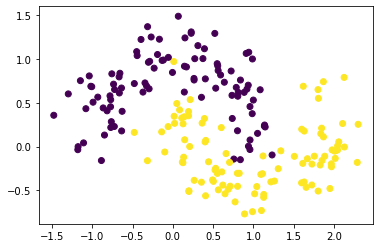

In [159]:
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)
plt.scatter(X[:,0], X[:,1], c = y)

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree = DecisionTreeEntropyClassifier(max_depth=5)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.925


In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tr = DecisionTreeClassifier(max_depth=5)
tr.fit(X_train, y_train)

y_pred = tr.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.95


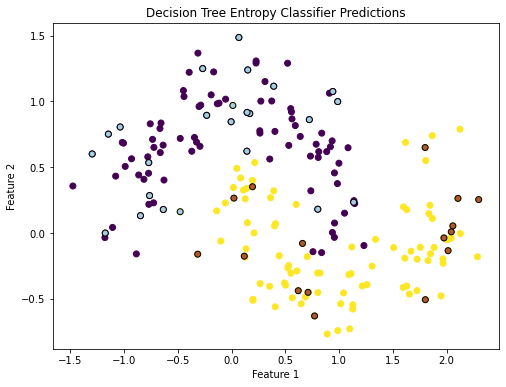

In [130]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:,1], c = y)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap=plt.cm.Paired, edgecolor='k')
plt.title("Decision Tree Entropy Classifier Predictions")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

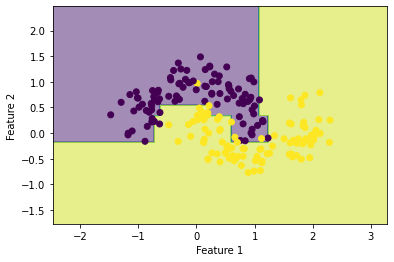

In [129]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.5)
plt.scatter(X[:,0], X[:,1], c = y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

<font color = 'red' size = 5>Задание 3 </font>

Для каждого из подзаданий:

1. Проведите предварительную обработку данных.
2. Постройте модель классификации на основе метода решающего дерева из встроенной библиотеки. 
3. Подберите оптимальные гиперпараметры модели используя различные оценки, кросс-валидацию и валидационные кривые.
4. Сделайте выводы о точности моделей.
5. Продумайте, как дерево может бороться с переобучением. Подвердите валидационными кривыми. 
6. Оцените качество модели с помощью precision\recall score.

(https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html)



##### 3.1 Скоринг отказа от услуг оператора связи.

Используйте данные из файла [telecom.csv](https://www.kaggle.com/datasets/mnassrib/telecom-churn-datasets/code) для предсказания отказа от услуг связи. Столбец "churn". 
Предврительно изучите и подготовьте данные.

#####  3.2 Предсказание диабета у пациентов.

Используйте данные из файла [diabetes.csv](https://www.kaggle.com/datasets/saurabh00007/diabetescsv) для предсказания исхода для пациентов. Столбец "outcome". Предварительно изучите и подготовьте данные. 


##### 3.3 Данные о цветках ириса

[IrisDataset](https://www.kaggle.com/datasets/uciml/iris)

##### 3.4 Грибы

Поппробуйте предсказать съедобность гриба с помощью дерева принятия решений.
[mushrooms](https://www.kaggle.com/datasets/uciml/mushroom-classification/code)



In [161]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix

#### telecom

In [33]:
telecom = pd.read_csv('telecom_output.csv')

In [34]:
X, y = telecom.drop(['churn'], axis=1), telecom['churn']

scaler = StandardScaler()

X_std = scaler.fit_transform(X)
poly = PolynomialFeatures(degree=2) 
X_std_poly2 = poly.fit_transform(X_std)

X_std_poly2.shape

(3333, 78)

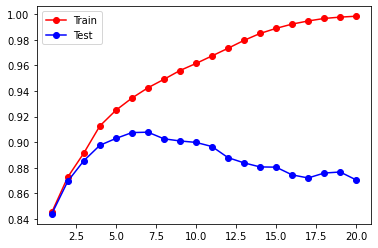

In [187]:
tree = DecisionTreeClassifier()
parameters = {'max_depth': range(1, 21)}
clf = GridSearchCV(tree, parameters, cv=5, scoring='f1_weighted', return_train_score=True)
clf.fit(X, y)
results = clf.cv_results_

plt.plot(range(1, 21), results['mean_train_score'], 'r-o')
plt.plot(range(1, 21), results['mean_test_score'], 'b-o')

plt.legend(['Train', 'Test'])

plt.show()

Валидационная поверхность 

In [35]:
tree = DecisionTreeClassifier()
parameters = {'min_samples_leaf': range(1, 10), 'max_depth': range(1, 10)}
clf = GridSearchCV(tree, parameters, cv=5, scoring='f1_weighted', return_train_score=True)
clf.fit(X, y)
results = clf.cv_results_

In [41]:
from mpl_toolkits.mplot3d import Axes3D

In [56]:
min_sl_values = results['param_min_samples_leaf'].data.astype(float)
max_d_values = results['param_max_depth'].data.astype(float)

accuracy_values_test = results['mean_test_score']
accuracy_values_train = results['mean_train_score']

In [57]:
min_sl_values = np.unique(min_sl_values)
max_d_values = np.unique(max_d_values)
min_sl_mesh, max_d_mesh = np.meshgrid(min_sl_values, max_d_values) #meshgrid создает матрицы из координатных векторов

ac_train = np.array(accuracy_values_train).reshape(len(max_d_values), len(min_sl_values))
ac_test = np.array(accuracy_values_test).reshape(len(max_d_values), len(min_sl_values))

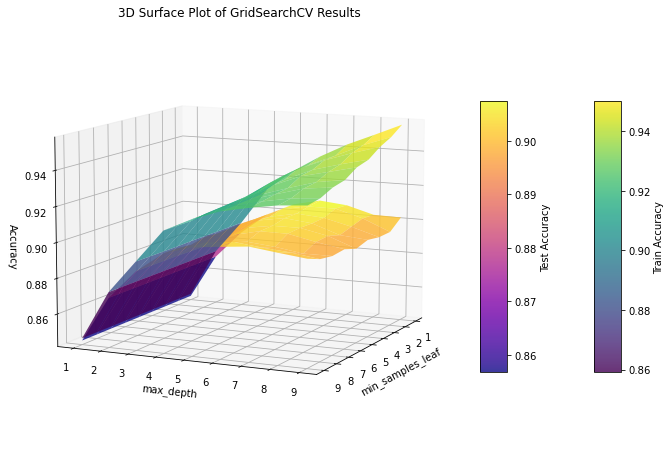

In [69]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

surface_train = ax.plot_surface(min_sl_mesh, max_d_mesh, ac_train, cmap='viridis', rstride=1, cstride=1, alpha=0.8, antialiased=True)
surface_test = ax.plot_surface(min_sl_mesh, max_d_mesh, ac_test, cmap='plasma', rstride=1, cstride=1, alpha=0.8, antialiased=True)

cbar1 = fig.colorbar(surface_train, ax=ax, shrink=0.5, aspect=10)
cbar1.set_label('Train Accuracy')

cbar2 = fig.colorbar(surface_test, ax=ax, shrink=0.5, aspect=10)
cbar2.set_label('Test Accuracy')

ax.set_xlabel('min_samples_leaf')
ax.set_ylabel('max_depth')
ax.set_zlabel('Accuracy')
ax.view_init(elev=10, azim=25)

plt.title('3D Surface Plot of GridSearchCV Results')
plt.show()

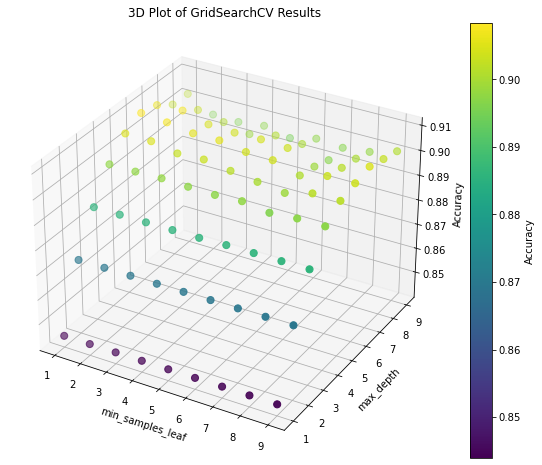

In [43]:

# Создание 3D-графика
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Построение точек
scatter = ax.scatter(min_samples_leaf_values, max_depth_values, accuracy_values, c=accuracy_values, cmap='viridis', s=50)

# Добавление цветной шкалы
cbar = fig.colorbar(scatter)
cbar.set_label('Accuracy')

# Настройка меток осей
ax.set_xlabel('min_samples_leaf')
ax.set_ylabel('max_depth')
ax.set_zlabel('Accuracy')

# Добавление заголовка
plt.title('3D Plot of GridSearchCV Results')

plt.show()


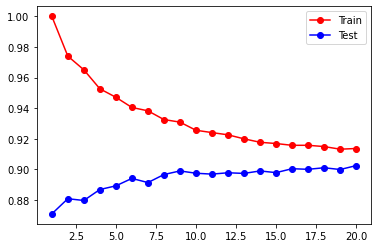

In [189]:
tree = DecisionTreeClassifier()
parameters = {'min_samples_leaf': range(1, 10), 'max_depth': range(1, 10)}
clf = GridSearchCV(tree, parameters, cv=5, scoring='f1_weighted', return_train_score=True)
clf.fit(X, y)
results = clf.cv_results_

fig = plt.figure()

ax = plt.axes(projection='3d')
 
ax.plot_surface(x, y, z, cmap='viridis',\
                edgecolor='green')
ax.set_title('Surface plot geeks for geeks')
plt.show()

plt.plot(range(1, 21), results['mean_train_score'], 'r-o')
plt.plot(range(1, 21), results['mean_test_score'], 'b-o')

plt.legend(['Train', 'Test'])

plt.show()

In [188]:
best_params = clf.best_params_
best_score = clf.best_score_
print(best_params, best_score)

{'max_depth': 7} 0.9078666324686406


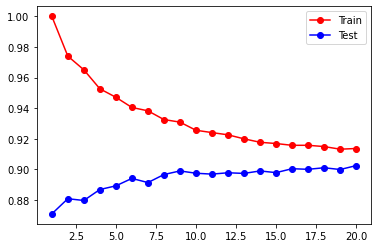

In [189]:
tree = DecisionTreeClassifier()
parameters = {'min_samples_leaf': range(1, 21)}
clf = GridSearchCV(tree, parameters, cv=5, scoring='f1_weighted', return_train_score=True)
clf.fit(X, y)
results = clf.cv_results_

plt.plot(range(1, 21), results['mean_train_score'], 'r-o')
plt.plot(range(1, 21), results['mean_test_score'], 'b-o')

plt.legend(['Train', 'Test'])

plt.show()

In [111]:
best_params = clf.best_params_
best_score = clf.best_score_
print(best_params, best_score)

{'min_samples_leaf': 20} 0.9033221560026512


In [190]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
random_state=42)

In [191]:
tree = DecisionTreeClassifier()
parameters = {'min_samples_leaf': range(1, 21),'max_depth': range(1, 21)}
clf = GridSearchCV(tree, parameters, cv=5, scoring='f1_weighted', return_train_score=True)
clf.fit(X_train, y_train)
results = clf.cv_results_

In [165]:
best_params = clf.best_params_
best_score = clf.best_score_
print(best_params, best_score)

{'max_depth': 6, 'min_samples_leaf': 2} 0.9621031746031747


In [192]:
tree = DecisionTreeClassifier(max_depth = 6, min_samples_leaf = 2)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

In [193]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'Precision: {precision}')
print(f'Recall: {recall}')

Precision: 0.8390804597701149
Recall: 0.5104895104895105


In [194]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       857
           1       0.84      0.51      0.63       143

    accuracy                           0.92      1000
   macro avg       0.88      0.75      0.79      1000
weighted avg       0.91      0.92      0.91      1000



#### diabetes

In [169]:
diabet = pd.read_csv('diabetes.csv')

In [170]:
X, y = diabet.drop(['Outcome'], axis=1), diabet['Outcome']

scaler = StandardScaler()

X_std = scaler.fit_transform(X)
poly = PolynomialFeatures(degree=2) 
X_std_poly2 = poly.fit_transform(X_std)

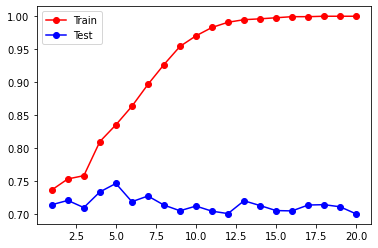

In [171]:
tree = DecisionTreeClassifier()
parameters = {'max_depth': range(1, 21)}
clf = GridSearchCV(tree, parameters, cv=5, scoring='f1_weighted', return_train_score=True)
clf.fit(X, y)
results = clf.cv_results_

plt.plot(range(1, 21), results['mean_train_score'], 'r-o')
plt.plot(range(1, 21), results['mean_test_score'], 'b-o')

plt.legend(['Train', 'Test'])

plt.show()

In [172]:
best_params = clf.best_params_
best_score = clf.best_score_
print(best_params, best_score)

{'max_depth': 5} 0.746518812662455


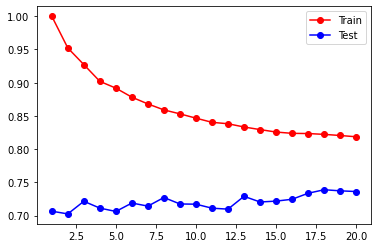

In [173]:
tree = DecisionTreeClassifier()
parameters = {'min_samples_leaf': range(1, 21)}
clf = GridSearchCV(tree, parameters, cv=5, scoring='f1_weighted', return_train_score=True)
clf.fit(X, y)
results = clf.cv_results_

plt.plot(range(1, 21), results['mean_train_score'], 'r-o')
plt.plot(range(1, 21), results['mean_test_score'], 'b-o')

plt.legend(['Train', 'Test'])

plt.show()

In [174]:
best_params = clf.best_params_
best_score = clf.best_score_
print(best_params, best_score)

{'min_samples_leaf': 18} 0.7388569059378055


In [176]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
random_state=42)

In [177]:
tree = DecisionTreeClassifier()
parameters = {'min_samples_leaf': range(1, 21),'max_depth': range(1, 21)}
clf = GridSearchCV(tree, parameters, cv=5, scoring='f1_weighted', return_train_score=True)
clf.fit(X_train, y_train)
results = clf.cv_results_

In [178]:
best_params = clf.best_params_
best_score = clf.best_score_
print(best_params, best_score)

{'max_depth': 9, 'min_samples_leaf': 9} 0.7512523261496068


In [180]:
tree = DecisionTreeClassifier(max_depth = 9, min_samples_leaf = 9)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

In [181]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'Precision: {precision}')
print(f'Recall: {recall}')

Precision: 0.5567010309278351
Recall: 0.675


In [89]:
from sklearn.metrics import classification_report

In [184]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.72      0.76       151
           1       0.56      0.68      0.61        80

    accuracy                           0.70       231
   macro avg       0.68      0.70      0.68       231
weighted avg       0.72      0.70      0.71       231



#### Iris

In [195]:
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target

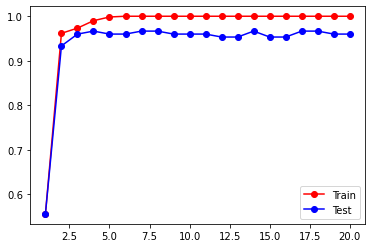

In [139]:
tree = DecisionTreeClassifier()
parameters = {'max_depth': range(1, 21)}
clf = GridSearchCV(tree, parameters, cv=5, scoring='f1_weighted', return_train_score=True)
clf.fit(X, y)
results = clf.cv_results_

plt.plot(range(1, 21), results['mean_train_score'], 'r-o')
plt.plot(range(1, 21), results['mean_test_score'], 'b-o')

plt.legend(['Train', 'Test'])

plt.show()

In [140]:
best_params = clf.best_params_
best_score = clf.best_score_
print(best_params, best_score)

{'max_depth': 4} 0.9665831244778612


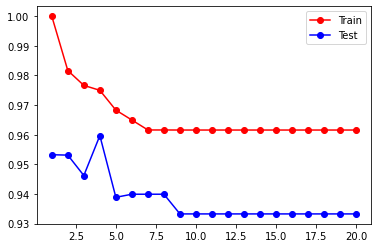

In [141]:
tree = DecisionTreeClassifier()
parameters = {'min_samples_leaf': range(1, 21)}
clf = GridSearchCV(tree, parameters, cv=5, scoring='f1_weighted', return_train_score=True)
clf.fit(X, y)
results = clf.cv_results_

plt.plot(range(1, 21), results['mean_train_score'], 'r-o')
plt.plot(range(1, 21), results['mean_test_score'], 'b-o')

plt.legend(['Train', 'Test'])

plt.show()

In [142]:
best_params = clf.best_params_
best_score = clf.best_score_
print(best_params, best_score)

{'min_samples_leaf': 4} 0.9596972228551175


In [196]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
random_state=42)

In [197]:
tree = DecisionTreeClassifier()
parameters = {'min_samples_leaf': range(1, 21),'max_depth': range(1, 21)}
clf = GridSearchCV(tree, parameters, cv=5, scoring='f1_weighted', return_train_score=True)
clf.fit(X_train, y_train)
results = clf.cv_results_

In [198]:
best_params = clf.best_params_
best_score = clf.best_score_
print(best_params, best_score)

{'max_depth': 4, 'min_samples_leaf': 3} 0.942638234781092


In [199]:
tree = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 3)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

In [203]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



#### mushrooms

In [74]:
mushrooms = pd.read_csv('mushrooms.csv')

In [8]:
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [148]:
mushrooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [149]:
mushrooms.select_dtypes('object').nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [75]:
mushrooms = mushrooms.drop(['veil-type'], axis=1)
mushrooms

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,s,o,o,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,s,o,o,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,s,o,o,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,s,k,w,w,w,o,e,w,v,l


In [206]:
lc = LabelEncoder()
for column in mushrooms.columns:
    mushrooms[column] = lc.fit_transform(mushrooms[column])

In [21]:
ar.reshape(-1, 1)

array([[8124]])

In [22]:
ar = mushrooms['cap-shape']

In [152]:
mushrooms

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,2,5,5,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,2,5,5,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,2,5,5,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,2,1,7,7,2,1,0,7,4,2


In [153]:
mushrooms['class'].value_counts()

0    4208
1    3916
Name: class, dtype: int64

In [207]:
X, y = mushrooms.drop(['class'], axis=1), mushrooms['class']

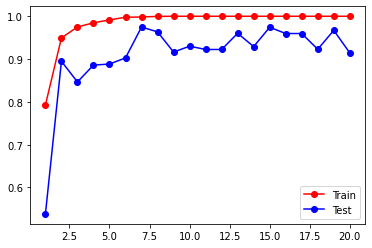

In [155]:
tree = DecisionTreeClassifier()
parameters = {'max_depth': range(1, 21)}
clf = GridSearchCV(tree, parameters, cv=5, scoring='f1_weighted', return_train_score=True)
clf.fit(X, y)
results = clf.cv_results_

plt.plot(range(1, 21), results['mean_train_score'], 'r-o')
plt.plot(range(1, 21), results['mean_test_score'], 'b-o')

plt.legend(['Train', 'Test'])

plt.show()

In [156]:
best_params = clf.best_params_
best_score = clf.best_score_
print(best_params, best_score)

{'max_depth': 7} 0.9747402859609056


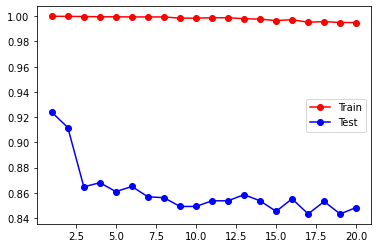

In [157]:
tree = DecisionTreeClassifier()
parameters = {'min_samples_leaf': range(1, 21)}
clf = GridSearchCV(tree, parameters, cv=5, scoring='f1_weighted', return_train_score=True)
clf.fit(X, y)
results = clf.cv_results_

plt.plot(range(1, 21), results['mean_train_score'], 'r-o')
plt.plot(range(1, 21), results['mean_test_score'], 'b-o')

plt.legend(['Train', 'Test'])

plt.show()

In [158]:
best_params = clf.best_params_
best_score = clf.best_score_
print(best_params, best_score)

{'min_samples_leaf': 1} 0.923834033294207


In [208]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
random_state=42)

In [209]:
tree = DecisionTreeClassifier()
parameters = {'min_samples_leaf': range(1, 21),'max_depth': range(1, 21)}
clf = GridSearchCV(tree, parameters, cv=5, scoring='f1_weighted', return_train_score=True)
clf.fit(X_train, y_train)
results = clf.cv_results_

In [198]:
best_params = clf.best_params_
best_score = clf.best_score_
print(best_params, best_score)

{'max_depth': 4, 'min_samples_leaf': 3} 0.942638234781092


In [199]:
tree = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 3)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

In [203]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [76]:
oc = OneHotEncoder(handle_unknown='ignore', sparse=False)

for column in mushrooms.columns:
    mushrooms[column] = oc.fit_transform(np.asarray(mushrooms[column]).reshape(-1, 1))

In [77]:
mushrooms

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8120,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8121,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8122,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [78]:
mushrooms['class'].value_counts()

1.0    4208
0.0    3916
Name: class, dtype: int64

In [79]:
X, y = mushrooms.drop(['class'], axis=1), mushrooms['class']

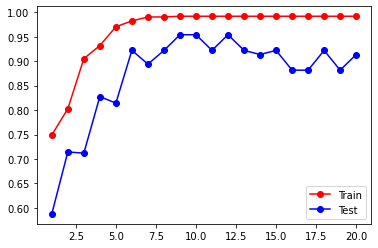

In [80]:
tree = DecisionTreeClassifier()
parameters = {'max_depth': range(1, 21)}
clf = GridSearchCV(tree, parameters, cv=5, scoring='f1_weighted', return_train_score=True)
clf.fit(X, y)
results = clf.cv_results_

plt.plot(range(1, 21), results['mean_train_score'], 'r-o')
plt.plot(range(1, 21), results['mean_test_score'], 'b-o')

plt.legend(['Train', 'Test'])

plt.show()

In [81]:
best_params = clf.best_params_
best_score = clf.best_score_
print(best_params, best_score)

{'max_depth': 9} 0.9541219304786164


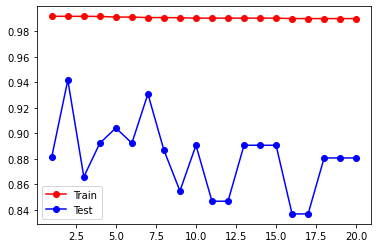

In [82]:
tree = DecisionTreeClassifier()
parameters = {'min_samples_leaf': range(1, 21)}
clf = GridSearchCV(tree, parameters, cv=5, scoring='f1_weighted', return_train_score=True)
clf.fit(X, y)
results = clf.cv_results_

plt.plot(range(1, 21), results['mean_train_score'], 'r-o')
plt.plot(range(1, 21), results['mean_test_score'], 'b-o')

plt.legend(['Train', 'Test'])

plt.show()

In [83]:
best_params = clf.best_params_
best_score = clf.best_score_
print(best_params, best_score)

{'min_samples_leaf': 2} 0.941808193545624


In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
random_state=42)

In [85]:
tree = DecisionTreeClassifier()
parameters = {'min_samples_leaf': range(1, 21),'max_depth': range(1, 21)}
clf = GridSearchCV(tree, parameters, cv=5, scoring='f1_weighted', return_train_score=True)
clf.fit(X_train, y_train)
results = clf.cv_results_

In [86]:
best_params = clf.best_params_
best_score = clf.best_score_
print(best_params, best_score)

{'max_depth': 9, 'min_samples_leaf': 2} 0.9917314942144813


In [87]:
tree = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 3)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

In [90]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.76      0.84      1181
         1.0       0.81      0.97      0.88      1257

    accuracy                           0.86      2438
   macro avg       0.88      0.86      0.86      2438
weighted avg       0.88      0.86      0.86      2438



<font color = 'red' size = 5>Задание 4 </font>

Используя встроенные методы реализуйте регрессию с помощью решающего дерева. Примените для данных из предыдущих ЛР. Сделайте выводы. По какому принципу работает дерево в случае регресии?

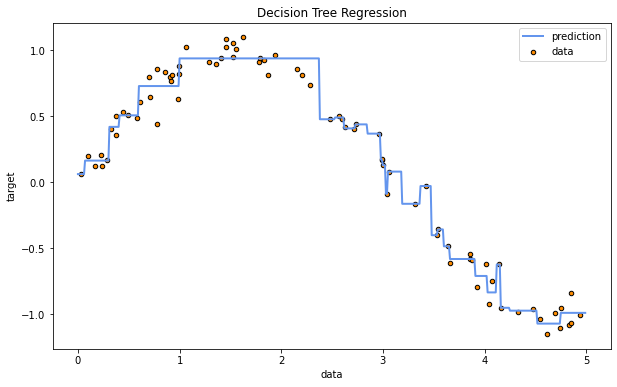

In [77]:
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

regressor = DecisionTreeRegressor(max_depth=5)
regressor.fit(X, y)

X_new = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_pred = regressor.predict(X_new)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_new, y_pred, color="cornflowerblue", label="prediction", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()


In [210]:
auto = pd.read_csv("auto-mpg.csv")

In [211]:
auto = auto.drop(["car name"], axis=1)
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [212]:
auto["horsepower"] = auto["horsepower"].replace('?',np.nan)
auto["horsepower"] = auto["horsepower"].fillna(auto["horsepower"].median()) 

In [213]:
X, y = auto.drop(["mpg"], axis=1).to_numpy(), auto["mpg"].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
random_state=42)

In [214]:
regressor = DecisionTreeRegressor(random_state=12)
regressor.fit(X_train, y_train) 

DecisionTreeRegressor(random_state=12)

In [215]:
regressor.get_depth()

17

In [216]:
regressor.get_n_leaves()

230

In [217]:
regressor.score(X_test, y_test)

0.8178921712524402

In [218]:
y_pred = regressor.predict(X_test)

In [220]:
y_pred

array([32. , 26. , 18. , 14. , 17.5, 25. , 23.6, 12. , 23.9, 19. , 13. ,
       34.1, 26. , 14. , 26. , 11. , 26. , 16.5, 15.5, 38.1, 26. , 21. ,
       38. , 30.5, 17. , 36. , 28. , 25.5, 17.6, 13. , 27. , 36. , 18.2,
       22. , 39. , 14. , 20. , 17.5, 14. , 26. , 28.8, 29.5, 19. , 11. ,
       22. , 35.7, 26. , 21.5, 24. , 26.5, 21. , 29.8, 32.2, 11. , 26.6,
       13. , 16.5, 32.9, 22. , 21. , 15. , 32. , 26. , 23. , 20. , 22. ,
       23. , 32.3, 23. , 14. , 34.2, 15. , 14. , 18. , 25.4, 23.9, 18.5,
       31. , 29. , 17.6, 18. , 27. , 37.7, 38. , 26. , 13. , 31.8, 33.8,
       19. , 12. , 16. , 35.7, 28. , 29. , 20.3, 36. , 27.2, 22.4, 23. ,
       14. , 29.5, 20. , 21. , 14. , 17. , 14. , 29.5, 14. , 33.7, 31.8,
       31. , 25. , 17.6, 34.1, 28.4, 23. , 29. , 22.4, 44.3, 16.5])

In [222]:
y_test

array([33. , 28. , 19. , 13. , 14. , 27. , 24. , 13. , 17. , 21. , 15. ,
       38. , 26. , 15. , 25. , 12. , 31. , 17. , 16. , 31. , 22. , 22. ,
       22. , 33.5, 18. , 44. , 26. , 24.5, 18.1, 12. , 27. , 36. , 23. ,
       24. , 37.2, 16. , 21. , 19.2, 16. , 29. , 26.8, 27. , 18. , 10. ,
       23. , 36. , 26. , 25. , 25. , 25. , 22. , 34.1, 32.4, 13. , 23.5,
       14. , 18.5, 29.8, 28. , 19. , 11. , 33. , 23. , 21. , 23. , 25. ,
       23.8, 34.4, 24.5, 13. , 34.7, 14. , 15. , 18. , 25. , 19.9, 17.5,
       28. , 29. , 17. , 16. , 27. , 37. , 36.1, 23. , 14. , 32.8, 29.9,
       20. , 12. , 15.5, 23.7, 24. , 36. , 19. , 38. , 29. , 21.5, 27.9,
       14. , 36.1, 22. , 18. , 17. , 18. , 14. , 26. , 13. , 33. , 37. ,
       32. , 28. , 19.2, 32. , 27.4, 20. , 26. , 20.6, 37.3, 16.2])

### Доп

In [237]:
mushrooms = pd.read_csv('mushrooms.csv')

In [238]:
oc = OneHotEncoder(handle_unknown='ignore', sparse=False)

for column in mushrooms.columns:
    mushrooms[column] = oc.fit_transform(np.asarray(mushrooms[column]).reshape(-1, 1))

In [239]:
mushrooms

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
8120,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
8121,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
8122,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [78]:
mushrooms['class'].value_counts()

1.0    4208
0.0    3916
Name: class, dtype: int64

In [240]:
X, y = mushrooms.drop(['class'], axis=1), mushrooms['class']

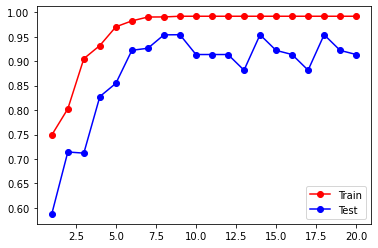

In [241]:
tree = DecisionTreeClassifier()
parameters = {'max_depth': range(1, 21)}
clf = GridSearchCV(tree, parameters, cv=5, scoring='f1_weighted', return_train_score=True)
clf.fit(X, y)
results = clf.cv_results_

plt.plot(range(1, 21), results['mean_train_score'], 'r-o')
plt.plot(range(1, 21), results['mean_test_score'], 'b-o')

plt.legend(['Train', 'Test'])

plt.show()

In [242]:
best_params = clf.best_params_
best_score = clf.best_score_
print(best_params, best_score)

{'max_depth': 9} 0.9541219304786164


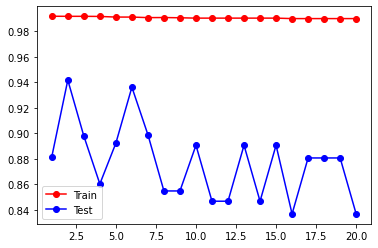

In [243]:
tree = DecisionTreeClassifier()
parameters = {'min_samples_leaf': range(1, 21)}
clf = GridSearchCV(tree, parameters, cv=5, scoring='f1_weighted', return_train_score=True)
clf.fit(X, y)
results = clf.cv_results_

plt.plot(range(1, 21), results['mean_train_score'], 'r-o')
plt.plot(range(1, 21), results['mean_test_score'], 'b-o')

plt.legend(['Train', 'Test'])

plt.show()

In [244]:
best_params = clf.best_params_
best_score = clf.best_score_
print(best_params, best_score)

{'min_samples_leaf': 2} 0.941808193545624


In [245]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
random_state=42)

In [246]:
tree = DecisionTreeClassifier()
parameters = {'min_samples_leaf': range(1, 21),'max_depth': range(1, 21)}
clf = GridSearchCV(tree, parameters, cv=5, scoring='f1_weighted', return_train_score=True)
clf.fit(X_train, y_train)
results = clf.cv_results_

In [247]:
best_params = clf.best_params_
best_score = clf.best_score_
print(best_params, best_score)

{'max_depth': 9, 'min_samples_leaf': 2} 0.9917314942144813


In [258]:
tree = DecisionTreeClassifier(max_depth = 9, min_samples_leaf = 2)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

In [259]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      1181
         1.0       0.99      1.00      0.99      1257

    accuracy                           0.99      2438
   macro avg       0.99      0.99      0.99      2438
weighted avg       0.99      0.99      0.99      2438



Валидационная поверхность 

In [35]:
tree = DecisionTreeClassifier()
parameters = {'min_samples_leaf': range(1, 10), 'max_depth': range(1, 10)}
clf = GridSearchCV(tree, parameters, cv=5, scoring='f1_weighted', return_train_score=True)
clf.fit(X, y)
results = clf.cv_results_

In [41]:
from mpl_toolkits.mplot3d import Axes3D

In [56]:
min_sl_values = results['param_min_samples_leaf'].data.astype(float)
max_d_values = results['param_max_depth'].data.astype(float)

accuracy_values_test = results['mean_test_score']
accuracy_values_train = results['mean_train_score']

In [57]:
min_sl_values = np.unique(min_sl_values)
max_d_values = np.unique(max_d_values)
min_sl_mesh, max_d_mesh = np.meshgrid(min_sl_values, max_d_values) #meshgrid создает матрицы из координатных векторов

ac_train = np.array(accuracy_values_train).reshape(len(max_d_values), len(min_sl_values))
ac_test = np.array(accuracy_values_test).reshape(len(max_d_values), len(min_sl_values))

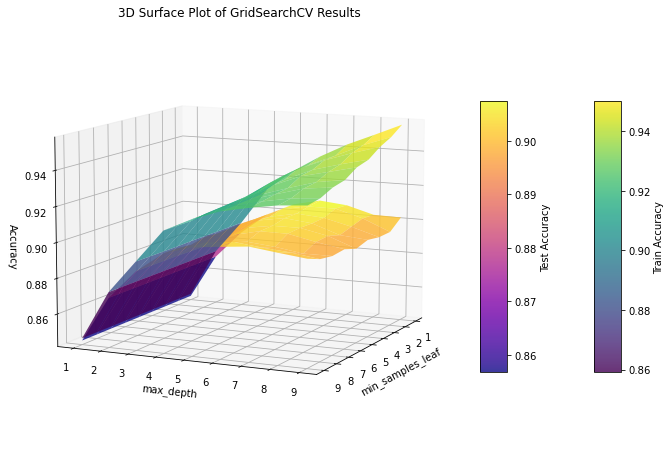

In [69]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

surface_train = ax.plot_surface(min_sl_mesh, max_d_mesh, ac_train, cmap='viridis', rstride=1, cstride=1, alpha=0.8, antialiased=True)
surface_test = ax.plot_surface(min_sl_mesh, max_d_mesh, ac_test, cmap='plasma', rstride=1, cstride=1, alpha=0.8, antialiased=True)

cbar1 = fig.colorbar(surface_train, ax=ax, shrink=0.5, aspect=10)
cbar1.set_label('Train Accuracy')

cbar2 = fig.colorbar(surface_test, ax=ax, shrink=0.5, aspect=10)
cbar2.set_label('Test Accuracy')

ax.set_xlabel('min_samples_leaf')
ax.set_ylabel('max_depth')
ax.set_zlabel('Accuracy')
ax.view_init(elev=10, azim=25)

plt.title('3D Surface Plot of GridSearchCV Results')
plt.show()

Animals

In [224]:
animals = pd.read_csv('data.csv')

In [188]:
animals

,AnimalName,symptoms1,symptoms2,symptoms3,symptoms4,symptoms5,Dangerous
0,Dog,Fever,Diarrhea,Vomiting,Weight loss,Dehydration,Yes
1,Dog,Fever,Diarrhea,Coughing,Tiredness,Pains,Yes
2,Dog,Fever,Diarrhea,Coughing,Vomiting,Anorexia,Yes
3,Dog,Fever,Difficulty breathing,Coughing,Lethargy,Sneezing,Yes
4,Dog,Fever,Diarrhea,Coughing,Lethargy,Blue Eye,Yes
...,...,...,...,...,...,...,...
866,Buffaloes,Fever,Difficulty breathing,Poor Appetite,Eye and Skin change,Unable to exercise,Yes
867,Buffaloes,Fever,Loss of appetite,Lession on the skin,Lethargy,Joint Pain,Yes
868,Buffaloes,Lesions in the nasal cavity,Lesions on nose,Vomiting,Noisy Breathing,Lesions on nose,Yes
869,Buffaloes,Hair loss,Dandruff,Vomiting,Crusting of the skin,Ulcerated skin,Yes


In [189]:
animals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871 entries, 0 to 870
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   AnimalName  871 non-null    object
 1   symptoms1   871 non-null    object
 2   symptoms2   871 non-null    object
 3   symptoms3   871 non-null    object
 4   symptoms4   871 non-null    object
 5   symptoms5   871 non-null    object
 6   Dangerous   869 non-null    object
dtypes: object(7)
memory usage: 47.8+ KB


In [190]:
list_of_animals = animals['AnimalName'].unique()

In [191]:
value_counts = animals[animals['AnimalName'].isin(list_of_animals)]['Dangerous'].value_counts()

In [192]:
value_counts

Yes    849
No      20
Name: Dangerous, dtype: int64

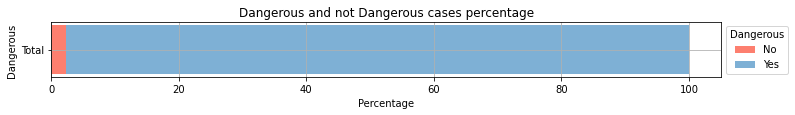

In [193]:
total_count = value_counts.sum()
percentage_no = (value_counts['No'] / total_count) * 100
percentage_yes = (value_counts['Yes'] / total_count) * 100

plt.figure(figsize=(12, 1))
colors = ['#fd7f6f', '#7eb0d5']
plt.barh(['Total'], [percentage_no], color=colors[0], label='No')
plt.barh(['Total'], [percentage_yes], color=colors[1], left=[percentage_no], label='Yes')

plt.title('Dangerous and not Dangerous cases percentage')
plt.xlabel('Percentage')
plt.ylabel('Dangerous')
plt.grid(True)
plt.legend(title='Dangerous', loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [194]:
animals[animals['Dangerous'].isnull()]

,AnimalName,symptoms1,symptoms2,symptoms3,symptoms4,symptoms5,Dangerous
269,Sheep,Teeth griding,Apathy,Dehydration,Ruminal stasis,Watery faeces,NaN
695,Buffaloes,Teeth griding,Apathy,Dehydration,Ruminal stasis,Watery faeces,NaN


In [225]:
buffaloes_condition = animals.loc[((animals['AnimalName'] == 'Buffaloes') & 
                                   (animals['symptoms3'] == 'rapid pulse and heart rates') & 
                                   (animals['symptoms4'] == 'lameness in affected leg')), 'Dangerous'].mode()[0]

data = animals[(animals['Dangerous'].isnull()) & (animals['AnimalName'] == 'Buffaloes')]
# Fill missing values in 'Dangerous' for the specified condition
animals.loc[(animals['Dangerous'].isnull()) & 
            (animals['AnimalName'] == 'Buffaloes'), 'Dangerous'] = data['Dangerous'].fillna(buffaloes_condition)

In [226]:
sheep_value = animals.loc[((animals['AnimalName'] == 'Sheep') & (animals['symptoms3'] == 'Dehydration')), 'Dangerous'].mode()[0]

data = animals[(animals['Dangerous'].isnull()) & (animals['AnimalName'] == 'Sheep')]
animals.loc[(animals['Dangerous'].isnull()) & (animals['AnimalName'] == 'Sheep'), 'Dangerous'] = data['Dangerous'].fillna(sheep_value)

In [227]:
animals['Dangerous'].isnull().sum()

0

In [198]:
onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

animals['AnimalName'] = oc.fit_transform(np.asarray(animals['AnimalName']).reshape(-1, 1))
animals['Dangerous'] = oc.fit_transform(np.asarray(animals['Dangerous']).reshape(-1, 1))

In [228]:
onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

for column in animals.columns:
    animals[column] = oc.fit_transform(np.asarray(animals[column]).reshape(-1, 1))

In [229]:
X, y = animals.drop(['Dangerous'], axis=1), animals['Dangerous']

In [230]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [231]:
tree = DecisionTreeClassifier()
parameters = {'min_samples_leaf': range(1, 15),'max_depth': range(1, 15)}
clf = GridSearchCV(tree, parameters, cv=5, scoring='f1_weighted', return_train_score=True)
clf.fit(X_train, y_train)
results = clf.cv_results_

In [232]:
best_params = clf.best_params_
best_score = clf.best_score_
print(best_params, best_score)

{'max_depth': 1, 'min_samples_leaf': 1} 0.961385261933924


In [233]:
tree = DecisionTreeClassifier(max_depth = 7, min_samples_leaf = 1)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

In [234]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       173
         1.0       0.00      0.00      0.00         2

    accuracy                           0.99       175
   macro avg       0.49      0.50      0.50       175
weighted avg       0.98      0.99      0.98       175



C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [199]:
animals

,AnimalName,symptoms1,symptoms2,symptoms3,symptoms4,symptoms5,Dangerous
0,0.0,Fever,Diarrhea,Vomiting,Weight loss,Dehydration,0.0
1,0.0,Fever,Diarrhea,Coughing,Tiredness,Pains,0.0
2,0.0,Fever,Diarrhea,Coughing,Vomiting,Anorexia,0.0
3,0.0,Fever,Difficulty breathing,Coughing,Lethargy,Sneezing,0.0
4,0.0,Fever,Diarrhea,Coughing,Lethargy,Blue Eye,0.0
...,...,...,...,...,...,...,...
866,0.0,Fever,Difficulty breathing,Poor Appetite,Eye and Skin change,Unable to exercise,0.0
867,0.0,Fever,Loss of appetite,Lession on the skin,Lethargy,Joint Pain,0.0
868,0.0,Lesions in the nasal cavity,Lesions on nose,Vomiting,Noisy Breathing,Lesions on nose,0.0
869,0.0,Hair loss,Dandruff,Vomiting,Crusting of the skin,Ulcerated skin,0.0


In [200]:
animals['Symptoms'] = animals[['symptoms1', 'symptoms2', 'symptoms3', 'symptoms4', 'symptoms5']].apply(lambda x: ' '.join(x), axis=1)

In [201]:
animals.drop(['symptoms1', 'symptoms2', 'symptoms3', 'symptoms4', 'symptoms5'], axis=1, inplace=True)

In [202]:
animals

,AnimalName,Dangerous,Symptoms
0,0.0,0.0,Fever Diarrhea Vomiting Weight loss Dehydration
1,0.0,0.0,Fever Diarrhea Coughing Tiredness Pains
2,0.0,0.0,Fever Diarrhea Coughing Vomiting Anorexia
3,0.0,0.0,Fever Difficulty breathing Coughing Lethargy S...
4,0.0,0.0,Fever Diarrhea Coughing Lethargy Blue Eye
...,...,...,...
866,0.0,0.0,Fever Difficulty breathing Poor Appetite Eye a...
867,0.0,0.0,Fever Loss of appetite Lession on the skin Le...
868,0.0,0.0,Lesions in the nasal cavity Lesions on nose Vo...
869,0.0,0.0,Hair loss Dandruff Vomiting Crusting of the sk...


In [223]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [153]:
animals['Symptoms'][0].lower()

'fever diarrhea vomiting weight loss dehydration'

In [222]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def preprocess_text(text):
    text = text.lower()
    
    text = re.sub("[^0-9a-zA-Z]"," ", text)

    words = text.split()

    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word, pos='v') for word in words]
    words = [lemmatizer.lemmatize(word, pos='n') for word in words]
    words = [lemmatizer.lemmatize(word, pos='r') for word in words]
    words = [lemmatizer.lemmatize(word, pos='a') for word in words]

    processed_text = ' '.join(words)
    
    return processed_text

In [209]:
for i in range(len(animals['Symptoms'])):
    animals['Symptoms'][i] = preprocess_text(animals['Symptoms'][i])

C:\Users\user\AppData\Local\Temp/ipykernel_15824/2307627867.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  animals['Symptoms'][i] = preprocess_text(animals['Symptoms'][i])


In [210]:
animals

,AnimalName,Dangerous,Symptoms
0,0.0,0.0,fever diarrhea vomit weight loss dehydration
1,0.0,0.0,fever diarrhea cough tiredness pain
2,0.0,0.0,fever diarrhea cough vomit anorexia
3,0.0,0.0,fever difficulty breathe cough lethargy sneeze
4,0.0,0.0,fever diarrhea cough lethargy blue eye
...,...,...,...
866,0.0,0.0,fever difficulty breathe poor appetite eye ski...
867,0.0,0.0,fever loss appetite lession skin lethargy join...
868,0.0,0.0,lesion nasal cavity lesion nose vomit noisy br...
869,0.0,0.0,hair loss dandruff vomit crust skin ulcerate skin


In [211]:
Doc = [animals['Symptoms'][i] for i in range(len(animals['Symptoms']))]

In [212]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(Doc)

In [213]:
y = animals['Dangerous']

In [214]:
y.value_counts()

0.0    851
1.0     20
Name: Dangerous, dtype: int64

In [215]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [216]:
tree = DecisionTreeClassifier()
parameters = {'min_samples_leaf': range(1, 15),'max_depth': range(1, 15)}
clf = GridSearchCV(tree, parameters, cv=5, scoring='f1_weighted', return_train_score=True)
clf.fit(X_train, y_train)
results = clf.cv_results_

In [217]:
best_params = clf.best_params_
best_score = clf.best_score_
print(best_params, best_score)

{'max_depth': 12, 'min_samples_leaf': 1} 0.9886609522120684


In [219]:
tree = DecisionTreeClassifier(max_depth = 12, min_samples_leaf = 1)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

In [220]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       173
         1.0       1.00      1.00      1.00         2

    accuracy                           1.00       175
   macro avg       1.00      1.00      1.00       175
weighted avg       1.00      1.00      1.00       175



In [178]:
min_sl_values = results['param_min_samples_leaf'].data.astype(float)
max_d_values = results['param_max_depth'].data.astype(float)

accuracy_values_test = results['mean_test_score']
accuracy_values_train = results['mean_train_score']

In [179]:
min_sl_values = np.unique(min_sl_values)
max_d_values = np.unique(max_d_values)
min_sl_mesh, max_d_mesh = np.meshgrid(min_sl_values, max_d_values) #meshgrid создает матрицы из координатных векторов

ac_train = np.array(accuracy_values_train).reshape(len(max_d_values), len(min_sl_values))
ac_test = np.array(accuracy_values_test).reshape(len(max_d_values), len(min_sl_values))

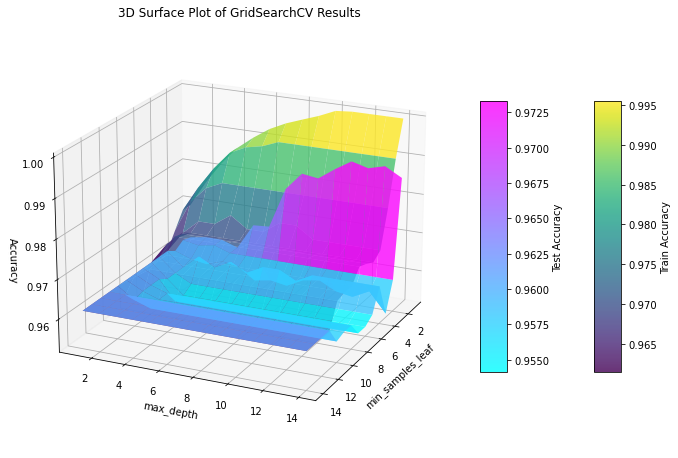

In [186]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

surface_train = ax.plot_surface(min_sl_mesh, max_d_mesh, ac_train, cmap='viridis', rstride=1, cstride=1, alpha=0.8, antialiased=True)
surface_test = ax.plot_surface(min_sl_mesh, max_d_mesh, ac_test, cmap='cool', rstride=1, cstride=1, alpha=0.8, antialiased=True)

cbar1 = fig.colorbar(surface_train, ax=ax, shrink=0.5, aspect=10)
cbar1.set_label('Train Accuracy')

cbar2 = fig.colorbar(surface_test, ax=ax, shrink=0.5, aspect=10)
cbar2.set_label('Test Accuracy')

ax.set_xlabel('min_samples_leaf')
ax.set_ylabel('max_depth')
ax.set_zlabel('Accuracy')
ax.view_init(elev=20, azim=25)

plt.title('3D Surface Plot of GridSearchCV Results')
plt.show()